In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Get data
data = pd.read_csv('https://raw.githubusercontent.com/Rus-tam/simple-isomerization-ML/main/data/new_data.csv')
data.head()

,vessel_volume,feed_temperature,feed_mass_flow,tr2-butene_mass_fr,feed_mass_dens,prod_mass_dens,prod_temperature
0,0.01,27.5,0.1389,0.9035,616.3583,565.5246,53.7641
1,0.01,27.5,0.1389,0.9035,616.3583,565.5246,53.7641
2,0.11,16.0,0.3056,0.9794,629.9060,574.4067,46.0478
3,0.11,16.0,0.3056,0.9794,629.9060,574.4067,47.7235
4,0.11,18.0,0.3056,0.9793,627.5852,572.1964,47.7235


## Plots

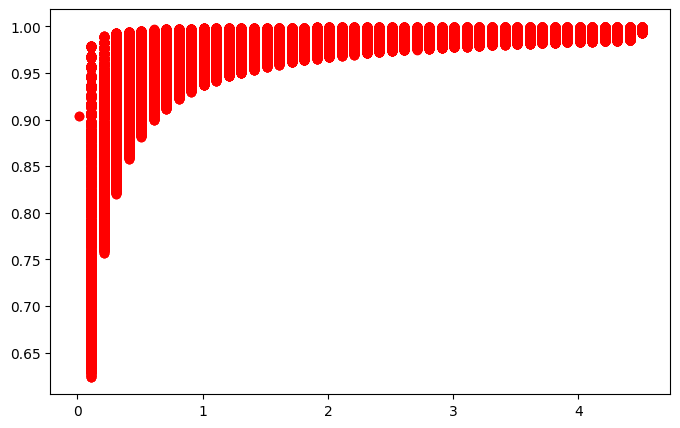

In [4]:
# Dependence of product concentration on reactor volume
plt.figure(figsize=(8, 5))

plt.scatter(data['vessel_volume'], data['tr2-butene_mass_fr'], c='r');

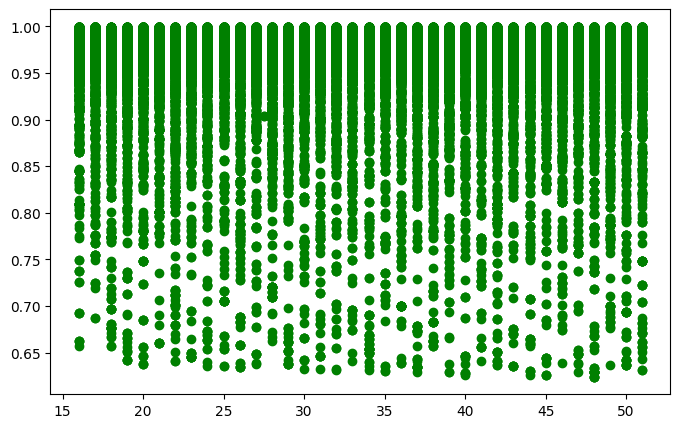

In [5]:
# Dependence of product concentration on feed temperature
plt.figure(figsize=(8, 5))

plt.scatter(data['feed_temperature'], data['tr2-butene_mass_fr'], c='g');

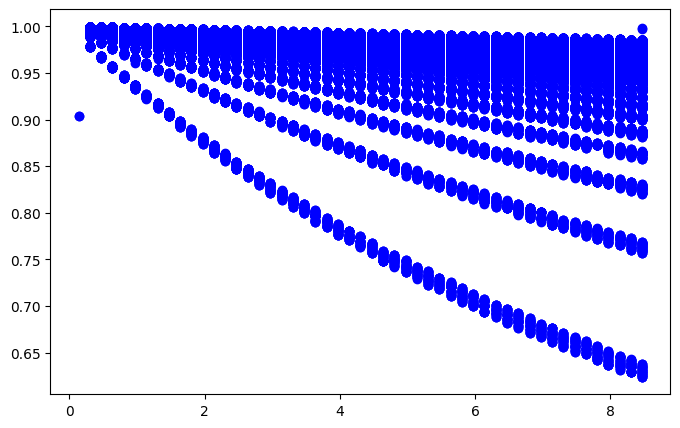

In [6]:
# Dependence of product concentration on feed mass flow
plt.figure(figsize=(8, 5))

plt.scatter(data['feed_mass_flow'], data['tr2-butene_mass_fr'], c='b');

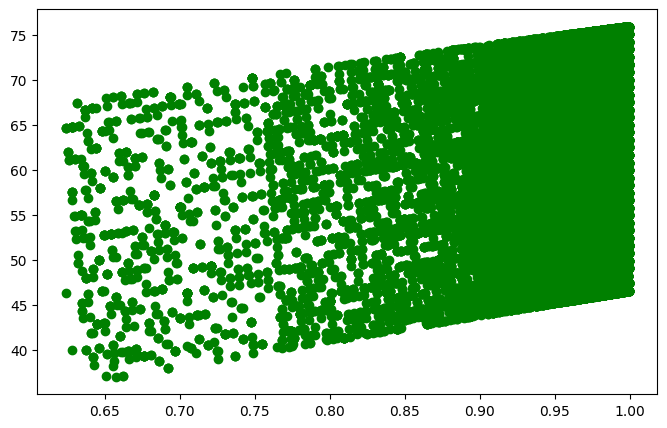

In [7]:
# Dependence of product temperature on product concentration
plt.figure(figsize=(8, 5))

plt.scatter(data['tr2-butene_mass_fr'], data['prod_temperature'], c='g');

In [8]:
data.columns

Index(['vessel_volume', 'feed_temperature', 'feed_mass_flow',
       'tr2-butene_mass_fr', 'feed_mass_dens', 'prod_mass_dens',
       'prod_temperature'],
      dtype='object')

In [9]:
# Create X & y values  (features and labels)
X = data.iloc[:, [0, 1, 2]]
y = data.iloc[:, [3, 6]]

In [10]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(80001, 64000, 16001)

## Build a neural network

In [11]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
isomerization_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[3]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)
])

# 2. Compile the model
isomerization_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
isomerization_model.fit(X_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
4000/4000 [==============================] - 19s 3ms/step - loss: 1.0816 - mae: 1.0816
Epoch 2/50
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6964 - mae: 0.6964
Epoch 3/50
4000/4000 [==============================] - 13s 3ms/step - loss: 0.6165 - mae: 0.6165
Epoch 4/50
4000/4000 [==============================] - 13s 3ms/step - loss: 0.5974 - mae: 0.5974
Epoch 5/50
4000/4000 [==============================] - 12s 3ms/step - loss: 0.5651 - mae: 0.5651
Epoch 6/50
4000/4000 [==============================] - 12s 3ms/step - loss: 0.5645 - mae: 0.5645
Epoch 7/50
4000/4000 [==============================] - 12s 3ms/step - loss: 0.5496 - mae: 0.5496
Epoch 8/50
4000/4000 [==============================] - 13s 3ms/step - loss: 0.5587 - mae: 0.5587
Epoch 9/50
4000/4000 [==============================] - 13s 3ms/step - loss: 0.5393 - mae: 0.5393
Epoch 10/50
4000/4000 [==============================] - 13s 3ms/step - loss: 0.5343 - mae: 0.5343
Epoch 11/50
4000/40

In [13]:
# Evaluate the model
isomerization_model.evaluate(X_test, y_test)

501/501 [==============================] - 1s 3ms/step - loss: 0.3985 - mae: 0.3985


[0.39845719933509827, 0.39845719933509827]

In [20]:
X_test

,vessel_volume,feed_temperature,feed_mass_flow
70181,3.91,29.0,8.4722
56602,3.21,21.0,3.9722
78689,4.41,43.0,6.1389
49846,2.81,35.0,5.9722
73421,4.11,30.0,6.8056
...,...,...,...
68320,3.81,40.0,8.1389
61523,3.51,48.0,1.6389
53460,3.01,48.0,5.9722
51755,2.91,36.0,6.4722


In [23]:
y_test

,tr2-butene_mass_fr,prod_temperature
70181,0.9834,57.0713
56602,0.9906,50.5384
78689,0.9890,68.9714
49846,0.9835,62.1182
73421,0.9873,58.0078
...,...,...
68320,0.9833,66.3174
61523,0.9962,73.3333
53460,0.9842,73.0640
51755,0.9828,62.9419


In [31]:
# Test model on separate data
vessel_volume = [1]
feed_temp = [20]
feed_mass_flow = [30000/3600]

test_data = pd.DataFrame({
    'vessel_volume': vessel_volume,
    'feed_temperature': feed_temp,
    'feed_mass_flow': feed_mass_flow
})

isomerization_model.predict(test_data)

1/1 [==============================] - 0s 20ms/step


array([[ 0.9371799, 47.768044 ]], dtype=float32)

In [32]:
isomerization_model.save('isomerization_model.h5')